<a href="https://colab.research.google.com/github/alinapradhan/DBSCAN-Implementation-from-Scratch/blob/main/DBCAN_Implementation_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles

# Synthetic Dataset Generator
class SyntheticDatasetGenerator:
    def __init__(self, random_state=42):
        self.rng = np.random.RandomState(random_state)

    def make_blobs(self, n_samples=1000, centers=4, cluster_std=0.8, n_features=2):
        X, y = make_blobs(n_samples=n_samples, centers=centers,
                          cluster_std=cluster_std, n_features=n_features,
                          random_state=self.rng)
        return X, y

    def make_moons(self, n_samples=1000, noise=0.1):
        X, y = make_moons(n_samples=n_samples, noise=noise, random_state=self.rng)
        return X, y

    def make_circles(self, n_samples=1000, factor=0.5, noise=0.05):
        X, y = make_circles(n_samples=n_samples, factor=factor,
                            noise=noise, random_state=self.rng)
        return X, y

    def make_spirals(self, n_samples=1000, noise=0.05, n_arms=2):
        n = n_samples // n_arms
        X, y = [], []
        for arm in range(n_arms):
            theta = np.linspace(0, 4*np.pi, n) + (2*np.pi*arm/n_arms)
            r = np.linspace(0.1, 1, n)
            x = r * np.cos(theta) + noise * self.rng.randn(n)
            yv = r * np.sin(theta) + noise * self.rng.randn(n)
            X.append(np.vstack([x, yv]).T)
            y.append(np.full(n, arm))
        X = np.vstack(X)
        y = np.concatenate(y)
        return X, y

    def make_anisotropic(self, n_samples=1000, centers=3, noise=0.05):
        X, y = make_blobs(n_samples=n_samples, centers=centers, random_state=self.rng)
        transformation = np.array([[0.6, -0.6], [-0.4, 0.8]])
        X = X.dot(transformation) + noise * self.rng.randn(*X.shape)
        return X, y

    def add_outliers(self, X, y=None, fraction=0.05, range_=(-5, 5)):
        """Adds outliers and keeps y aligned (outliers labeled -1)."""
        n_outliers = int(fraction * len(X))
        if n_outliers == 0:
            return X, y
        outliers = self.rng.uniform(range_[0], range_[1], size=(n_outliers, X.shape[1]))
        X_new = np.vstack([X, outliers])
        if y is not None:
            y_new = np.concatenate([y, np.full(n_outliers, -1)])  # -1 for outliers
        else:
            y_new = None
        return X_new, y_new

    def to_dataframe(self, X, y=None):
        df = pd.DataFrame(X, columns=[f"f{i+1}" for i in range(X.shape[1])])
        if y is not None:
            df["label"] = y
        return df

    def plot(self, X, y=None, title="Synthetic Dataset"):
        plt.figure(figsize=(6, 6))
        if y is None:
            plt.scatter(X[:, 0], X[:, 1], s=10)
        else:
            plt.scatter(X[:, 0], X[:, 1], c=y, cmap="tab10", s=10)
        plt.title(title)
        plt.show()




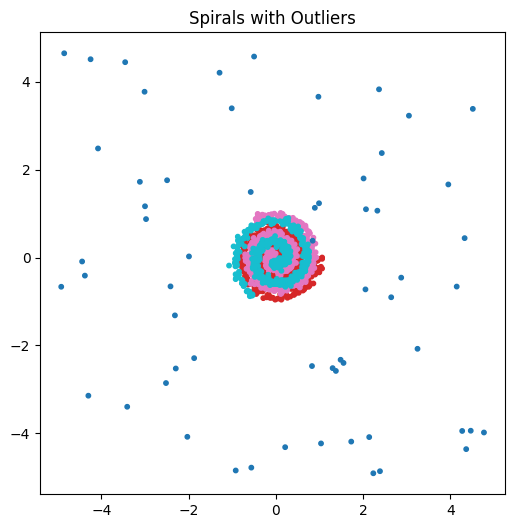

In [11]:
# Example Usage
gen = SyntheticDatasetGenerator()

# Example 1: Spirals with outliers (auto label fix)
X, y = gen.make_spirals(n_samples=1200, noise=0.05, n_arms=3)
X, y = gen.add_outliers(X, y, fraction=0.05)   # now X and y stay aligned
gen.plot(X, y, title="Spirals with Outliers")

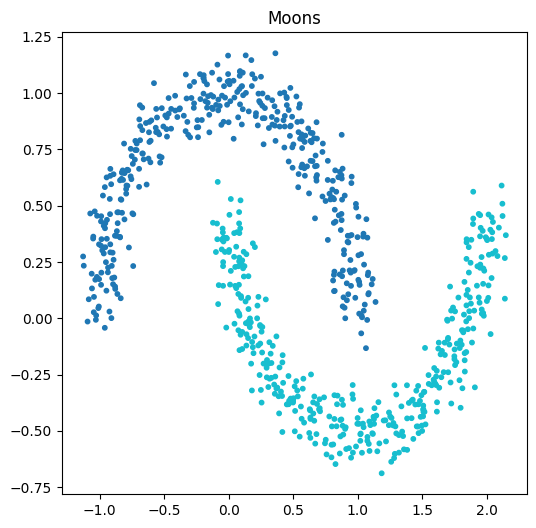

In [12]:
# Example 2: Moons
X, y = gen.make_moons(n_samples=800, noise=0.08)
gen.plot(X, y, title="Moons")

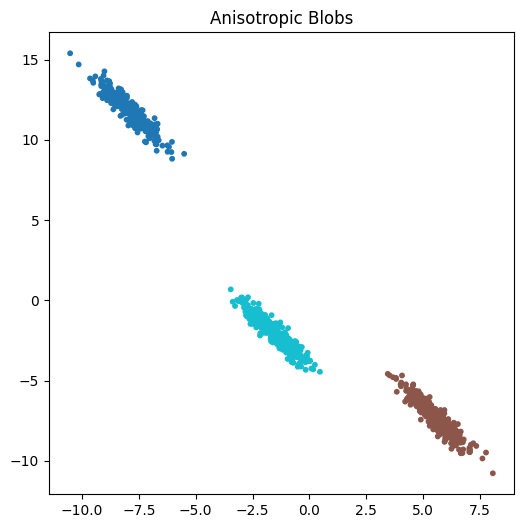

In [13]:
# Example 3: Anisotropic blobs
X, y = gen.make_anisotropic(n_samples=1000, centers=3, noise=0.1)
gen.plot(X, y, title="Anisotropic Blobs")

# Save dataset
df = gen.to_dataframe(X, y)
df.to_csv("synthetic_dataset.csv", index=False)